# KNN (K-NEAREST NEIGHBOUR)

In [40]:
# LOADING DATA :
import pandas as pd
data=pd.read_csv("Zoo.csv")

In [41]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [42]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [43]:
data.describe(include="object")

,animal name
count,101
unique,100
top,frog
freq,2


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [45]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [46]:
data.duplicated().sum()

0

<Axes: >

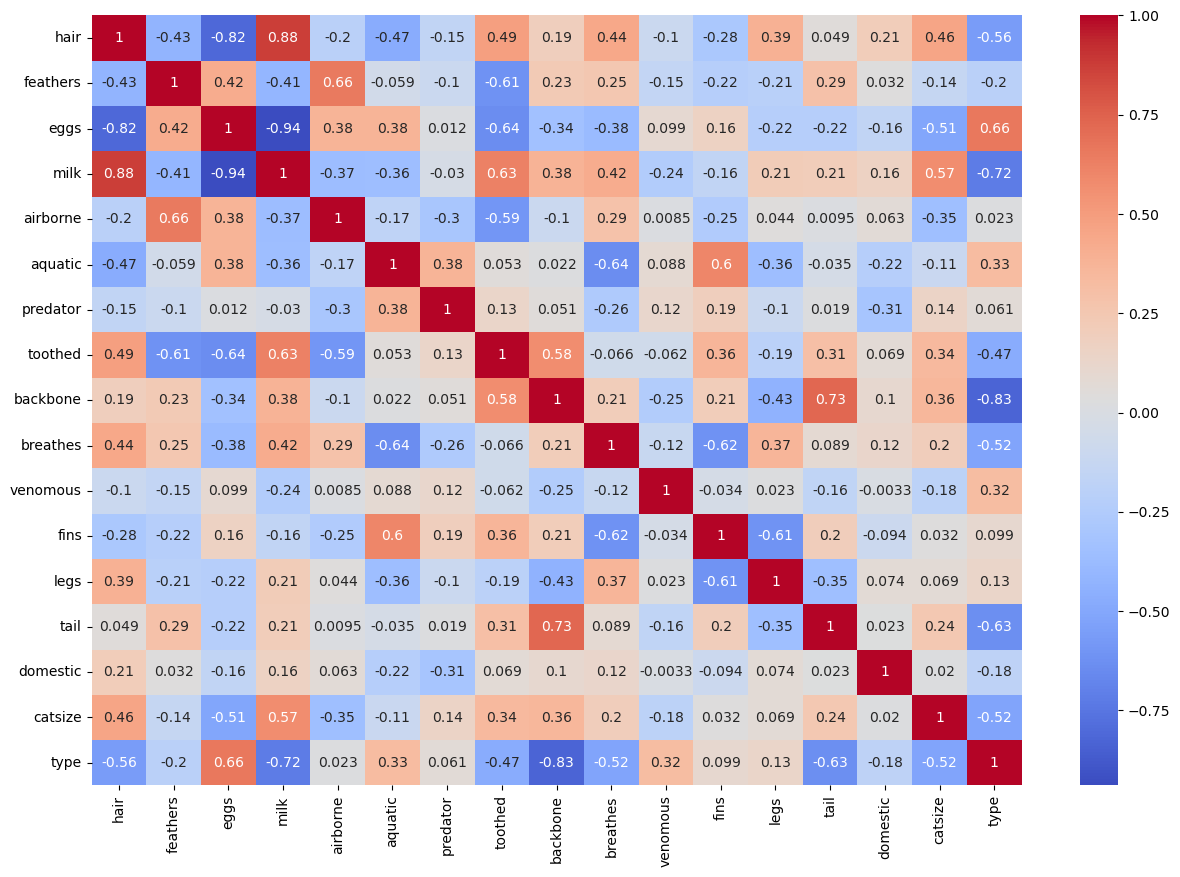

In [47]:
# CORRELATION ANLYSIS :
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(data.drop(columns=["animal name"]).corr(),annot=True,cmap="coolwarm")

<Axes: >

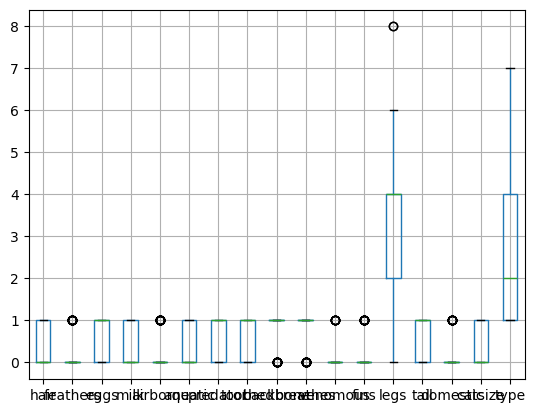

In [48]:
# OUTLIERS DETECTION :
data.boxplot()
# outliers present in 8 columns.out off 17 columns
# MINIMUM OUTLIERS ARE PRESENT : # KEEPING IT AS IT IS .

In [49]:
# SPLITING THE DATA INTO X AND Y
x=data.drop(columns=["animal name","type"])
y=data["type"]

In [50]:
y.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

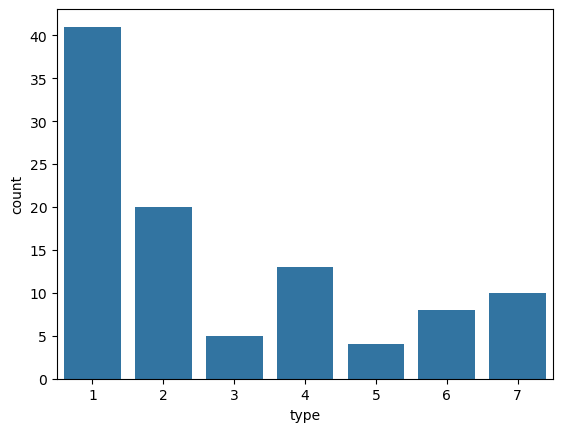

In [51]:
sns.countplot(data=data,x="type")

In [52]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [53]:
# SPLIT X-VARIBLES AND Y-VARIABLES :
x=data.drop(columns="animal name").iloc[:, :-1]
y=data.iloc[:,-1]

In [54]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [56]:
# SPLITTING THE DATA INTO TRAINING AND TESTING :
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [57]:
# CREATE KNN CLASSIFIER :
from sklearn.neighbors import KNeighborsClassifier
KNN_MODEL=KNeighborsClassifier(n_neighbors=3)

# FITTING TRAINING DATA :
KNN_MODEL.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [58]:
KNN_MODEL.score(xtrain,ytrain)

0.975

In [59]:
# TO CHECK CROSS VALIDATION SCORE :

from sklearn.model_selection import cross_val_score,KFold
num_folds = 10
kfold = KFold(n_splits=num_folds)
result=cross_val_score(KNN_MODEL,xtrain,ytrain,cv=kfold)

In [60]:
result.mean()
# 92% training accuracy

0.8875

In [61]:
y_pred=KNN_MODEL.predict(xtest)

In [62]:
# TRAINING ACCURACY | PRECISION | RECALL | F1 SCORE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy : ",accuracy_score(ytest,y_pred))
print("precision : ",precision_score(ytest,y_pred,average="weighted"))
print("recall : ",recall_score(ytest,y_pred,average="weighted"))
print("f1_score :",f1_score(ytest,y_pred,average="weighted"))
# 100% good performance

accuracy :  0.9523809523809523
precision :  0.9285714285714286
recall :  0.9523809523809523
f1_score : 0.9365079365079365


C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **HYPER PARAMETER TUNING :**

In [63]:
# K IS THE HYPER PARAMETER.
# HYPER PARAMETER TUNING USING GRID SEARCH ALGORITHM :
# THE K VALUE ALWAYS SHOULD BE ODD NUMBER .....
# FOR CREATING PARAMETER GRID :
import numpy as np
n_neighbors=np.array([2*i+1 for i in range(0,20)])
param_grid=dict(n_neighbors=n_neighbors)

In [64]:
# SET UP GRID SEARCH :
from sklearn.model_selection import GridSearchCV
Grid_Search=GridSearchCV(estimator=KNN_MODEL,param_grid=param_grid)

In [65]:
# FIT THE DATA TO GRID SEARCH :
Grid_Search.fit(xtrain,ytrain)

C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [66]:
# NOW TO GET THE BEST PARAMETER AND SCORE :
best_params=Grid_Search.best_params_
best_params

{'n_neighbors': 1}

In [67]:
best_score=Grid_Search.best_score_
best_score

0.9625

# CREATING UPDATED MODEL WITH NEW PARAMETERS :

In [68]:
# CREATE KNN CLASSIFIER :
from sklearn.neighbors import KNeighborsClassifier
KNN_MODEL=KNeighborsClassifier(n_neighbors=1)

# FITTING TRAINING DATA :
KNN_MODEL.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [69]:
KNN_MODEL.score(xtrain,ytrain)
# Training accuracy 100 %

1.0

In [70]:
# FITTING TEST DATA FOR PREDICTION :
ypred=KNN_MODEL.predict(xtest)

In [71]:
# TRAINING ACCURACY SCORE | PRECISION SCORE | RECALL SCORE | F1 SCORE .

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred,average="weighted"))
print(recall_score(ytest,ypred,average="weighted"))
print(f1_score(ytest,ypred,average="weighted"))


0.9523809523809523
0.9285714285714286
0.9523809523809523
0.9365079365079365


C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#  Visualize the decision boundaries of the classifier.

since our datast containt lagre number of features visualizing decision boundaries for a high-dimensional dataset can be challenging. that's why we can use a dimensionality reduction technique like PCA (Principal Component Analysis) to project the data into 2D space and then visualize the decision boundarie

In [72]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [73]:
# Reduce the dataset to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(xtrain)
X_test_pca = pca.transform(xtest)

In [74]:
# Train the KNN model on the reduced dataset
knn_best_pca = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_best_pca.fit(X_train_pca, ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [75]:
# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [76]:
# Predict on the mesh grid
Z = knn_best_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [77]:
# Create a scatter plot with decision boundaries
import plotly.express as px
fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=ytrain.astype(str), labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'color': 'Class'})

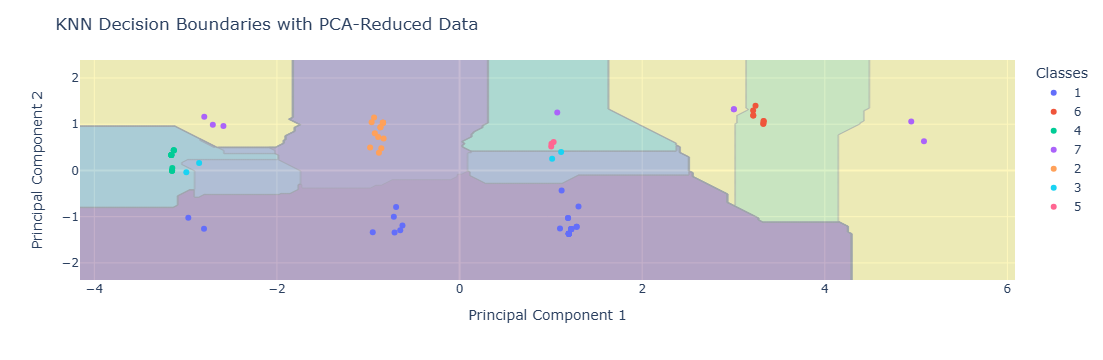

In [78]:
# Add decision boundary contours
import plotly.graph_objects as go
fig.add_trace(go.Contour(x=np.arange(x_min, x_max, h), y=np.arange(y_min, y_max, h), z=Z, showscale=False, colorscale='Viridis', opacity=0.3))
fig.update_layout(title='KNN Decision Boundaries with PCA-Reduced Data', legend_title_text='Classes')
fig.show()

# Interview Questions:

# 1. What are the key hyperparameters in KNN?